http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/timeseries_ssa.html

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

ModuleNotFoundError: No module named 'jyquickhelper'

In [3]:
import numpy.random as rnd
import numpy as np

N = 2000
bruit1 = rnd.normal(size=(N,))
temps = np.arange(N)
bruit1[:5], temps[:5]

(array([ 0.41225059, -0.44444498, -1.40692088,  0.14205856, -2.03289208]),
 array([0, 1, 2, 3, 4]))

In [4]:
import random

#노이즈 생성

bruit2 = np.zeros((N,))
for i in range(0, 10):
    h = random.randint(0, N-1)
    bruit2[h] = rnd.normal() + 10

In [7]:
serie = []
y = 10

for i in range(N//2 + 100):
    serie.append(y + bruit1[i] + 0.0004 * temps[i] + bruit2[i])
    if i > 30:
        y = 0.9 * serie[-2]
        
Y = np.array(serie[-1000:])
Y[:5]

array([ 0.72179757,  0.43518735, -0.05158733, -0.05127099,  1.93765968])

Text(0.5, 1.0, 'what is it')

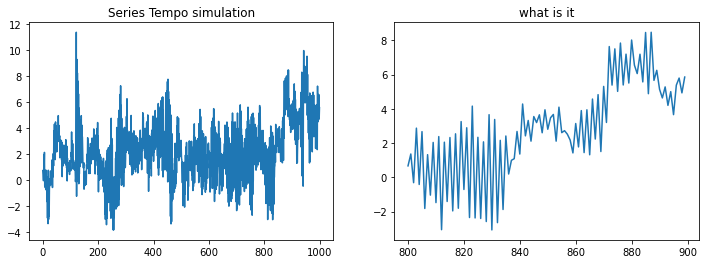

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(len(Y)), Y)
ax[1].plot(np.arange(800, 900), Y[800:900])

ax[0].set_title("Series Tempo simulation")
ax[1].set_title("what is it")

# AutoCorrelation

In [11]:
import pandas as pd

df = pd.DataFrame(dict(Y=Y))
df.head

<bound method NDFrame.head of             Y
0    0.721798
1    0.435187
2   -0.051587
3   -0.051271
4    1.937660
..        ...
995  5.851753
996  4.643274
997  6.565597
998  4.784537
999  5.566503

[1000 rows x 1 columns]>

In [12]:
from statsmodels.tsa.tsatools import detrend

df["notrend"] = detrend(df.Y)
df.head()

,Y,notrend
0,0.721798,-0.219824
1,0.435187,-0.508946
2,-0.051587,-0.998233
3,-0.051271,-1.000429
4,1.937660,0.985990


Text(0.5, 1.0, 'sans tendance')

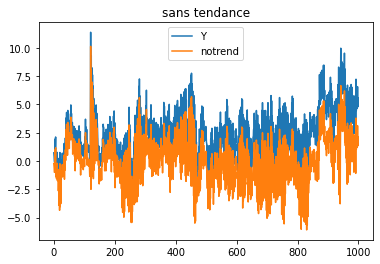

In [13]:
ax = df.plot()
ax.set_title("sans tendance")

C:\Users\qhrrl\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\qhrrl\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'auto correlations')

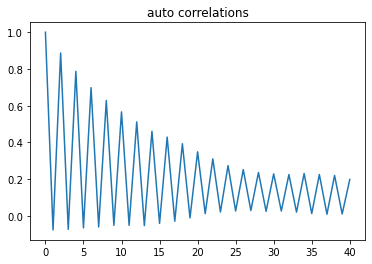

In [14]:
from statsmodels.tsa.stattools import acf

cor = acf(df.notrend)
fig, ax = plt.subplots(1, 1)
ax.plot(cor)
ax.set_title("auto correlations")

C:\Users\qhrrl\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


Text(0.5, 1.0, 'Auto correlation partial')

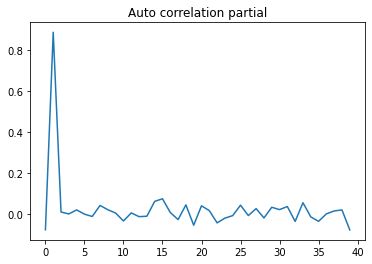

In [15]:
from statsmodels.tsa.stattools import pacf

pcor = pacf(df.notrend)
fig, ax = plt.subplots(1, 1)
ax.plot(pcor[1:])
ax.set_title("Auto correlation partial")

# SSA

In [16]:
def lagged_ts(serie, lag):
    dim = serie.shape[0]
    res = np.zeros((dim - lag + 1, lag))
    for i in range(lag):
        res[:,i] = serie[i:dim-lag+i+1]
    return res

In [17]:
lagged_ts(Y, 3)

array([[ 0.72179757,  0.43518735, -0.05158733],
       [ 0.43518735, -0.05158733, -0.05127099],
       [-0.05158733, -0.05127099,  1.93765968],
       ...,
       [ 5.85175309,  4.64327358,  6.56559696],
       [ 4.64327358,  6.56559696,  4.78453665],
       [ 6.56559696,  4.78453665,  5.56650253]])

In [18]:
lag = lagged_ts(Y, 60)
lag.shape

(941, 60)

In [19]:
from numpy.linalg import svd

In [20]:
u, s, vh = svd(lag)

In [21]:
u.shape, s.shape, vh.shape

((941, 941), (60,), (60, 60))

In [22]:
d = np.zeros((941, 60))
d[:60, :60] = np.diag(s)

In [23]:
(u @ d @ vh).shape

(941, 60)

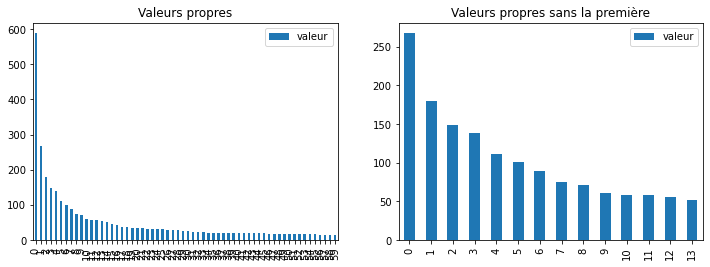

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pd.DataFrame(dict(valeur=s)).plot(kind="bar", ax=ax[0])
pd.DataFrame(dict(valeur=s[1:15])).plot(kind="bar",ax=ax[1])
ax[0].set_title("Valeurs propres")
ax[1].set_title("Valeurs propres sans la première");

AttributeError: 'int' object has no attribute 'zeros'

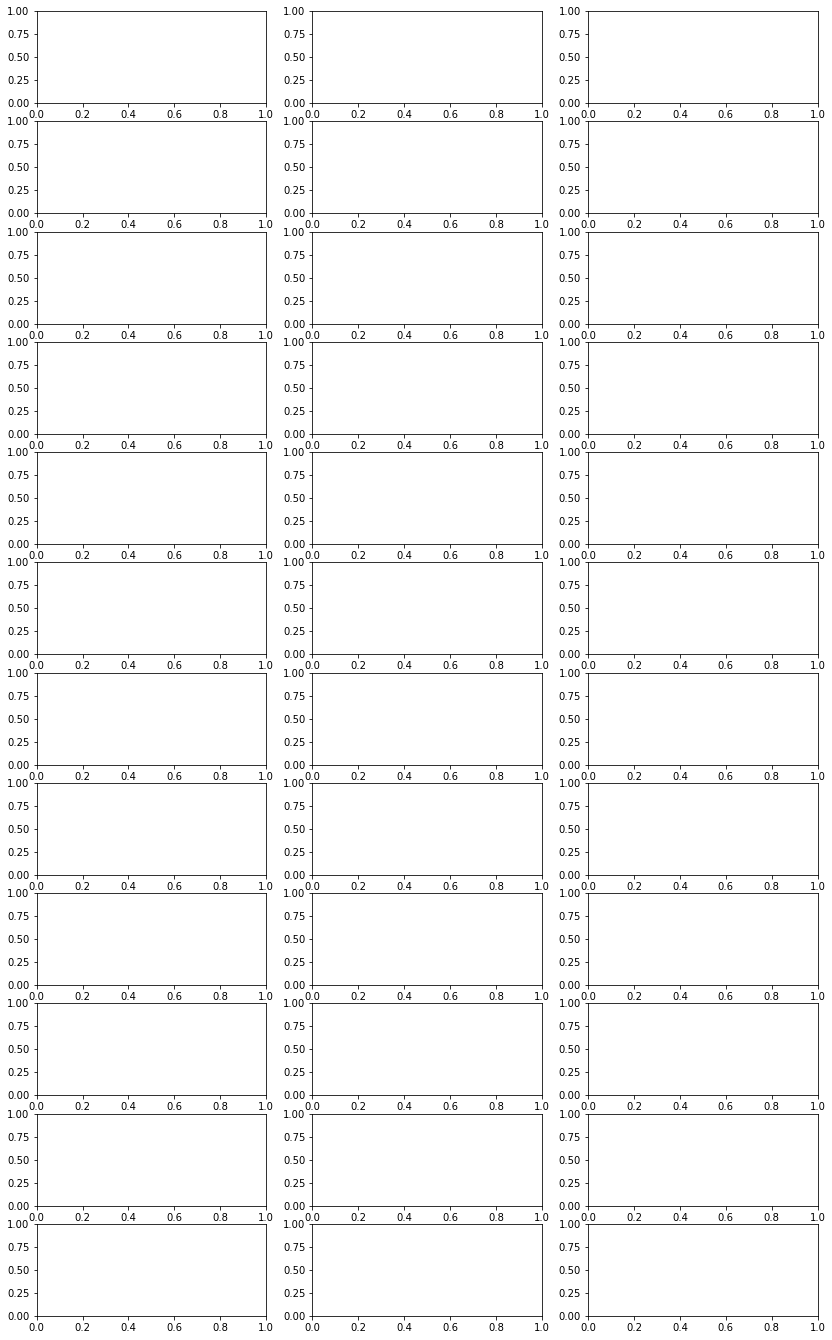

In [29]:
np = 12
fig, ax = plt.subplots(np, 3, figsize=(14, np*2))

for n in range(np):
    i = n if n < 5 else n * 5 - 15
    d = np.zeros((941, 60))
    d[i, i] = s[i]